In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
# dtype 설정하는 함수
def check_dtypes(file_path):
    print(file_path)
    tmp = pd.read_csv(file_path, sep='\t', nrows=0, header = None)
    col_dtypes = {}
    for col in tmp.columns:
        df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
        dtype = str(df[col].dtype)

        if "int" in dtype or "float" in dtype:
            c_min = df[col].min()
            c_max = df[col].max()
        elif dtype == "object":
            n_unique = df[col].nunique()
            threshold = n_unique / df.shape[0]

        if "int" in dtype:
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                col_dtype = "int8"
            elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                col_dtype = "uint8"
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                col_dtype = "int16"
            elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                col_dtype = "uint16"
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                col_dtype = "int32"
            elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                col_dtype = "uint32"
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                col_dtype = "int64"
            elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                col_dtype = "uint64"
            else:
                col_dtype = "uint64"

        elif "float" in dtype:
            if c_min > np.iinfo(np.float32).min and c_max < np.iinfo(np.float32).max:
                col_dtype = "float32"
            else:
                col_dtype = "float64"

        elif dtype == "object":
            if threshold > 0.7:
                col_dtype = "object"
            else:
                col_dtype = "category"

        col_dtypes[col] = col_dtype

    return col_dtypes

## Artist

- unique 개수 : 3169572

In [3]:
artist_path = '../data/LFM-1b_artists.txt'
data_types = check_dtypes(artist_path)
artists = pd.read_csv(artist_path, sep = '\t', dtype=data_types, header=None)
artists.columns = ['artist_id','artist_name']
artists.info()

./data/LFM-1b_artists.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169572 entries, 0 to 3169571
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   artist_id    int32 
 1   artist_name  object
dtypes: int32(1), object(1)
memory usage: 36.3+ MB


In [44]:
artists['artist_id'].nunique()

3169572

In [4]:
artists['artist_name'].nunique()

3162592

In [5]:
artists.isnull().sum()

artist_id      0
artist_name    5
dtype: int64

In [10]:
artists['artist_name'].duplicated().sum()

6979

In [4]:
artists['artist_id'].duplicated().sum()

0

In [9]:
artists[artists['artist_name'].duplicated()]['artist_name'].nunique()

6925

In [5]:
del artists # memory 절약

## Album

- album id unique 개수 : 15934220
- album name unique 개수 : 5847775
    - 동일한 이름을 가진 다른 앨범의 경우
        - 동일한 이름 & 동일한 아티스트인 경우 = 동일한 앨범
    - Nan 값 존재 : 1352241
    ---
- album id 와 이름이 1:1 매칭되지 않음
    - __album_id = track_id라면, 매칭되지 않을 수도 있음__
    - __single 발매의 경우 album으로 취급되지 않음(track only)__

In [6]:
album_path = '../data/LFM-1b_albums.txt'
data_types = check_dtypes(album_path)
albums = pd.read_csv(album_path, sep = '\t', dtype=data_types, header=None)
albums.columns = ['album_id','album_name','artist_id']
albums.info()

./data/LFM-1b_albums.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934220 entries, 0 to 15934219
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   album_id    int32   
 1   album_name  category
 2   artist_id   int32   
dtypes: category(1), int32(2)
memory usage: 356.0 MB


In [61]:
albums.isnull().sum()

album_id            0
album_name    1352241
artist_id           0
dtype: int64

In [49]:
albums['album_id'].nunique()

15934220

In [52]:
albums['album_name'].nunique()

5847775

In [7]:
albums['artist_id'].nunique()

3180677

In [8]:
albums['album_id'].duplicated().sum()

0

In [14]:
albums['album_name'].duplicated().sum()

10086444

In [9]:
albums['artist_id'].duplicated().sum()

12753543

In [19]:
len(albums) - (albums['album_name'].duplicated(keep=False).sum() + albums['album_name'].isnull().sum())
# 결측치, 중복값이 없는 album name 수

3121710

In [22]:
print("ratio of album_name without null n duplicates : ", (len(albums) - (albums['album_name'].duplicated(keep=False).sum() + albums['album_name'].isnull().sum()))/len(albums) * 100)

ratio of album_name without null n duplicates :  19.591231952364158


In [55]:
albums_sort = albums.sort_values(by='album_name')

In [62]:
albums_sort[520:550]

,album_id,album_name,artist_id
4046858,4056112,#1,60506
1497114,1501163,#1,237137
687454,687663,#1,206344
14561287,14610884,#1,2884943
11741372,11778919,#1,18437
8101155,8122961,#1,676569
13620083,13663325,#1,39056
3954056,3961641,#1,509405
13042473,13085046,#1,468567
13620082,13663324,#1,21447


In [10]:
del albums

## Track

- track_id unique값 : 32135384
- track_name unique : 22020444
    - track_name 중복값 : 12680490
- 대부분 1개의 track당 1명의 artist존재
    - ! 라는 track의 경우 114명 존재
        1. 하나의 노래에 114명이 있는 경우
        2. !라는 노래가 여러개 있는 경우
        - 구분할 수 있도록 전처리할 필요

In [11]:
track_path = '../data/LFM-1b_tracks.txt'
data_types = check_dtypes(track_path)
tracks = pd.read_csv(track_path, sep = '\t', dtype=data_types, header=None)
tracks.columns = ['track_id', 'track_name', 'artist_id']
tracks.info()

./data/LFM-1b_tracks.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135384 entries, 0 to 32135383
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   track_id    int32   
 1   track_name  category
 2   artist_id   int32   
dtypes: category(1), int32(2)
memory usage: 1.0 GB


In [68]:
tracks.isnull().sum()

track_id       0
track_name    89
artist_id      0
dtype: int64

In [66]:
tracks['track_id'].nunique()

32135384

In [67]:
tracks['track_name'].nunique()

22020444

In [73]:
tracks['track_name'].duplicated(keep=False).sum()

12680490

In [75]:
tracks.groupby('track_name')['artist_id'].count()

track_name
!                               114
! (Foreword)                      3
!!Oh Lord!! (Demo)                1
!;liaF cipE                       1
!liaF cipE                        1
                               ... 
ﾐﾇｿﾕ､ﾎSpica                       1
ﾒｻポｷﾖ､ﾎﾒｻ､ﾎﾐ｡ﾕh                   1
ﾒｻﾊｯ､ｶ､ｸ､・okyo midnight sun      1
ﾗﾌﾞ・ﾓｰﾒﾝﾄ                         1
�����fmTape1 - Осень              1
Name: artist_id, Length: 22020444, dtype: int64

In [76]:
del tracks

## Users

In [89]:
user_path = '../data/LFM-1b_users.txt'
data_types = check_dtypes(user_path)
users = pd.read_csv(user_path, sep = '\t', dtype=data_types)
users.columns = ['user_id', 'country', 'age', 'gender', 'playcount', 'registered_timestamp']
users.info()

./data/LFM-1b_users.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120322 entries, 0 to 120321
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   user_id               120322 non-null  object  
 1   country               55186 non-null   category
 2   age                   120322 non-null  category
 3   gender                120110 non-null  category
 4   playcount             120322 non-null  category
 5   registered_timestamp  120322 non-null  object  
dtypes: category(4), object(2)
memory usage: 4.1+ MB


- country, gender에 대해서 결측치를 자의적으로 채울 수는 없음

In [90]:
users.isnull().sum()

user_id                     0
country                 65136
age                         0
gender                    212
playcount                   0
registered_timestamp        0
dtype: int64

<AxesSubplot: >

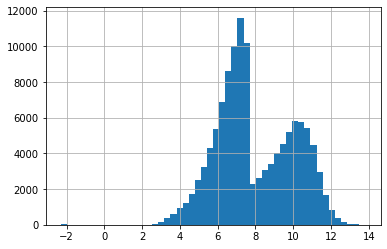

In [110]:
np.log(users['playcount'].astype('int32')+(1.1)).hist(bins=50) # log를 취해서 그룹화 할 수 있음 -> light, normal, heavy user

### users additional

In [113]:
user_add_path = '../data/LFM-1b_users_additional.txt'
data_types = check_dtypes(user_add_path)
users_add = pd.read_csv(user_add_path, sep = '\t', dtype=data_types)
users_add.info()

./data/LFM-1b_users_additional.txt


/tmp/ipykernel_124117/1142350585.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_124117/1142350585.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_124117/1142350585.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_124117/1142350585.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_124117/1142350585.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120322 entries, 0 to 120321
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   user-id                       120322 non-null  object  
 1   novelty_artist_avg_month      120322 non-null  object  
 2   novelty_artist_avg_6months    120322 non-null  object  
 3   novelty_artist_avg_year       120322 non-null  object  
 4   mainstreaminess_avg_month     120322 non-null  object  
 5   mainstreaminess_avg_6months   120322 non-null  category
 6   mainstreaminess_avg_year      120322 non-null  object  
 7   mainstreaminess_global        120322 non-null  object  
 8   cnt_listeningevents           120322 non-null  category
 9   cnt_distinct_tracks           120322 non-null  category
 10  cnt_distinct_artists          120322 non-null  category
 11  cnt_listeningevents_per_week  120322 non-null  object  
 12  relative_le_per_weekday1      

In [1]:
# # 이건 너무 오래걸림 -> 한번에 불러와서 사용하지 말것
# LE_path = '../data/LFM-1b_LEs.txt'
# data_types = check_dtypes(LE_path)
# LEs = pd.read_csv(LE_path, sep = '\t', dtype=data_types, header=None, usecols = [-1])
# LEs.info()

In [4]:
LE_path = '../data/lfm1b_conv/lfm1b-artists.inter'
data_types = check_dtypes(LE_path)
LEs = pd.read_csv(LE_path, sep = '\t', dtype=data_types)
LEs.info()

./data/lfm1b_conv/lfm1b-artists.inter


/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65133026 entries, 0 to 65133025
Data columns (total 4 columns):
 #   Column            Dtype   
---  ------            -----   
 0   user_id:token     category
 1   artists_id:token  category
 2   timestamp:float   object  
 3   num_repeat:float  category
dtypes: category(3), object(1)
memory usage: 1.2+ GB


In [5]:
LEs.head()

,user_id:token,artists_id:token,timestamp:float,num_repeat:float
0,31435741,2,1385212958,31
1,31435741,13,1381867823,73
2,31435741,21,1370977938,54
3,31435741,32,1369853851,84
4,31435741,44,1369059233,807


In [7]:
import datetime

In [8]:
years = LEs.iloc[:,2].astype('int32').apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')).str[:4].astype('int32')

In [42]:
years[(years>=2015)].count() # 2015년 이후의 interaction 데이터는 거의 없음

4

In [43]:
del LEs

## artists.item

In [44]:
item_path = '../data/lfm1b_conv/lfm1b-artists.item'
data_types = check_dtypes(item_path)
items = pd.read_csv(item_path, sep = '\t', dtype=data_types)
items.info()

./data/lfm1b_conv/lfm1b-artists.item


/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169572 entries, 0 to 3169571
Data columns (total 2 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   artists_id:token  object
 1   name:token_seq    object
dtypes: object(2)
memory usage: 48.4+ MB


In [52]:
items.iloc[:,1].nunique()

3162592

In [55]:
items[items.iloc[:,1].duplicated(keep=False)].sort_values(by='name:token_seq') # 중복 값 약 6900개 존재

,artists_id:token,name:token_seq
278970,279761,#366: A life lived
3091457,3111382,#366: A life lived
1492495,1500205,'68
420268,423319,'68
243663,244192,((Thorlock))
...,...,...
11411,11412,NaN
61716,61717,NaN
179428,179429,NaN
460153,463214,NaN


In [56]:
del items

## artists.user

In [57]:
user_path = '../data/lfm1b_conv/lfm1b-artists.user'
data_types = check_dtypes(user_path)
users = pd.read_csv(user_path, sep = '\t', dtype=data_types)
users.info()

./data/lfm1b_conv/lfm1b-artists.user


/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=[col], header = None)
/tmp/ipykernel_130138/4284277936.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120322 entries, 0 to 120321
Data columns (total 48 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   user_id:token                       120322 non-null  object  
 1   country:token                       55186 non-null   category
 2   age:float                           120322 non-null  category
 3   gender:token                        120110 non-null  category
 4   playcount:float                     120322 non-null  category
 5   registered_timestamp:float          120322 non-null  object  
 6   novelty_artist_avg_month:float      120182 non-null  object  
 7   novelty_artist_avg_6months:float    120322 non-null  object  
 8   novelty_artist_avg_year:float       112792 non-null  object  
 9   mainstreaminess_avg_month:float     120322 non-null  object  
 10  mainstreaminess_avg_6months:float   101711 non-null  category
 11  mainstreamine

## 데이터의 문제점
1. album
    - name이 id와 매치가 되지 않음
    - name이 같은 경우, 동일한 album인지 다른 album인지 구분할 필요가 있음
        - album의 attribute를 통해서 파악해야함 -> Merge -> 메모리 문제 -> 분산 처리 필요
        - artist, genre등으로 파악해야함
2. track
    - album과 유사한 문제
    - track에 대한 attribute를 분석해 동일 track인지 아닌지 판별해야함

3. interaction
    - 2015년 이후의 interaction은 거의 없음 : 4개
        - 최신 데이터 사용 필요 -> 최소한 2022년도 까지 비는 년도는 없어야 한다고 생각

## LFM-1b Datatset summary

1. "We define a listening event as a quintuple specified by [user, artist, album, track and timestamp]
    - "The period during which we fetched the data ranges from Jan 2013 to Aug 2014"
---
1. listening event(LEs.txt)의 수집기간이 2013.01 ~ 2014.08 까지인게 맞나..?
    - 이것 역시 추가 데이터 수집 필요해 보임